In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime



In [2]:
import matplotlib.pylab as pylab

params = {#'legend.fontsize': 'x-large',
         #'axes.labelsize': 20,
         #'axes.titlesize':'x-large',
         'xtick.labelsize':20,
         'ytick.labelsize':20}
pylab.rcParams.update(params)

In [45]:
trigger_other = pd.read_excel('../data/all_paper_data.xlsx',sheet_name='Trigger Other')

In [4]:
trigger_other.head(1)

,Trig_date,District,Chiefdom,Section,Name_of_community,t_q1,t_q2,t_q3,t_q4,t_q5,t_q6,t_q7,t_q8,t_q9,t_q10,t_q11
0,2014-10-12,Kailahun,Luawa,Baoma,Sokebo,Last week,1.0,1.0,Youth Leader,Very High,With the interrvention of Restless Development...,do we need to avoid all bush meat or just monkeys,"Keeping sick persons in the community, Using t...","No sick person should be kept at home, No one ...",High rate of teenage pregnancy,They are capable of carrying out action plan a...


In [46]:
follow_up_other = pd.read_excel('../data/all_paper_data.xlsx',sheet_name='Follow Up Other')

In [6]:
follow_up_other.head(1)

,Date_of_Visit,District,Chiefdom,Section,Name_of_community,f_q1,f_q2,f_q3,f_q4,f_q5,f_q6
0,2015-01-10 00:00:00,Bo,Komboya,NaN,Mano,NaN,NaN,NaN,they happy now that the medical team are reall...,"no strnger is allow ,and hand washing is frequent","strangers are not allow,no body contact,no vis..."


In [7]:
digital = pd.read_csv('../data/digital.csv', low_memory=False)

In [9]:
digital.today.head(2)

0    3/24/2015
1    3/16/2015
Name: today, dtype: object

## Datetime Plots

In [10]:
trigger_dt = pd.to_datetime(trigger_other.Trig_date, infer_datetime_format=True, exact=False)
trigger_dt_range = pd.date_range(trigger_dt.min(), trigger_dt.max(),freq='D').values
trigger_counts = trigger_dt.value_counts().sort_index()
all_counts = trigger_counts.reindex(trigger_dt_range, fill_value=0)

In [11]:
def resilient_dt(dt_obj):
    try:
        return pd.to_datetime(dt_obj, infer_datetime_format=True, exact=False)
    except:
        return np.nan

In [12]:
def coerce_date(dt_obj, year):
    try:
        return dt_obj.replace(year=year)
    except ValueError:
        return np.nan

In [13]:
def fill_datetime(dt_obs, coerce_year = None):
    """Return datetime observations with consistent observation window
    """
    temp_dt = dt_obs.apply(lambda x: resilient_dt(x))#pd.to_datetime(dt_obs, infer_datetime_format=True)
    if coerce_year:
        temp_dt = temp_dt.apply(lambda x: coerce_date(x,coerce_year)) 
    temp_dt_range = pd.date_range(temp_dt.min(), temp_dt.max(),freq='D').values
    
    temp_counts = temp_dt.value_counts().sort_index()
    return temp_counts.reindex(temp_dt_range, fill_value=0)

In [14]:
f_res = follow_up_other.Date_of_Visit.apply(lambda x: resilient_dt(x))

In [15]:
f_res.value_counts()

2015-02-12    476
2015-02-11    331
2015-02-05    328
2015-03-14    316
2015-02-10    304
             ... 
2015-09-22      1
2015-10-03      1
2016-06-22      1
2015-09-20      1
2015-04-29      1
Name: Date_of_Visit, Length: 299, dtype: int64

In [16]:
trigger_counts  = fill_datetime(trigger_other.Trig_date)

In [17]:
followup_counts  = fill_datetime(follow_up_other.Date_of_Visit)

In [18]:
digital_counts = fill_datetime(digital.today, 2015)

/home/hereford/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


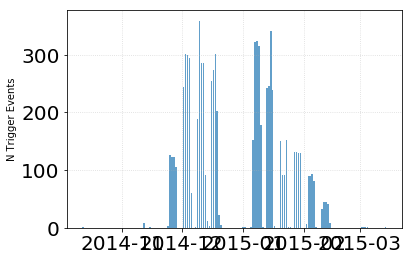

In [19]:
plt.bar(all_counts.index, all_counts.values,alpha=.7)
plt.ylabel('N Trigger Events')
plt.grid(linestyle=':',alpha=.5)

In [20]:
fc_b = followup_counts[followup_counts.index>datetime(2015,3,1)]

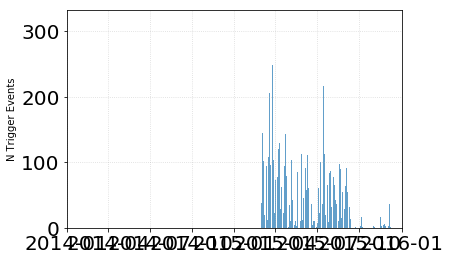

In [21]:
plt.bar(fc_b.index, fc_b.values,alpha=.7)
plt.ylabel('N Trigger Events')
plt.xlim(datetime(2014,1,1),datetime(2016,1,1))
plt.grid(linestyle=':',alpha=.5)

In [22]:
dc_b = digital_counts[(digital_counts.index>datetime(2015,3,1))]

In [23]:
dc_b.sum()

35095

In [24]:
pd.concat([dc_b,fc_b],axis=1)

,today,Date_of_Visit
2015-03-02,5.0,38
2015-03-03,7.0,57
2015-03-04,7.0,145
2015-03-05,4.0,45
2015-03-06,6.0,102
...,...,...
2025-05-24,NaN,0
2025-05-25,NaN,0
2025-05-26,NaN,0
2025-05-27,NaN,0


(array([735658., 735689., 735719., 735750., 735780., 735811., 735842.,
        735872., 735903., 735933., 735964.]),
 <a list of 11 Text xticklabel objects>)

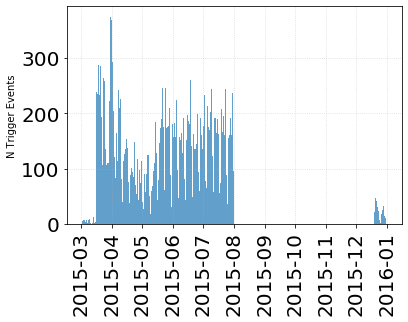

In [24]:
plt.bar(dc_b.index, dc_b.values, alpha=.7)
plt.ylabel('N Trigger Events')
plt.grid(linestyle=':',alpha=.5)
plt.xticks(rotation=90)

In [25]:
all_follow = pd.concat([dc_b,fc_b],axis=1)

In [26]:
all_follow.fillna(0,inplace=True)

In [27]:
all_follow = all_follow.today + all_follow.Date_of_Visit

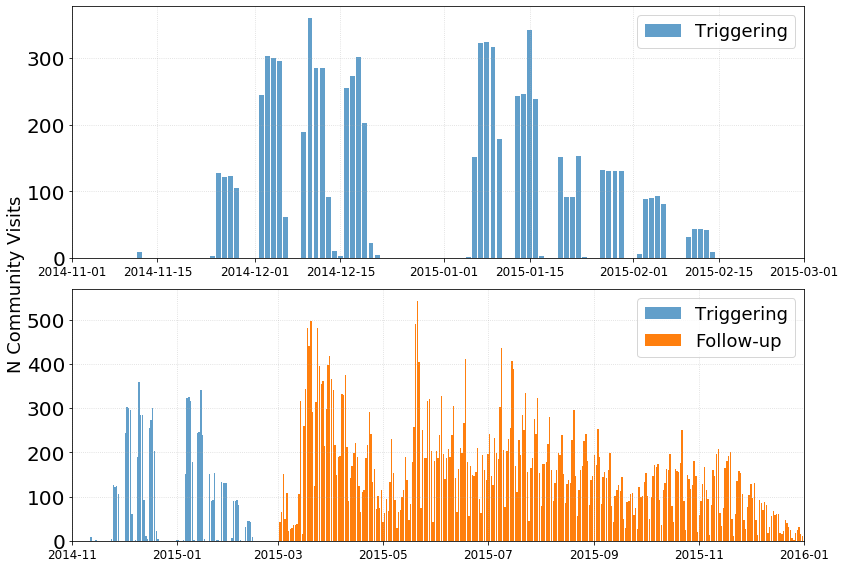

In [35]:
f,a = plt.subplots(2,1,figsize=(12,8))

a=a.ravel()

a[0].bar(all_counts.index, all_counts.values,alpha=.7,label='Triggering')
a[0].legend(fontsize=18)
#a[0].set_ylabel('N Trigger Events')
a[0].grid(linestyle=':',alpha=.5)
a[0].set_xlim(datetime(2014,11,1),datetime(2015,3,1))
a[0].tick_params(axis='x',labelrotation=0,labelsize=12)


a[1].bar(all_counts.index, all_counts.values,alpha=.7,label='Triggering')
#a[1].set_ylabel('N Trigger Events')
a[1].grid(linestyle=':',alpha=.5)
#a[1].annotate('Triggering + follow-up',(.6,.8), xycoords='axes fraction', fontsize=18)

a[1].bar(all_follow.index, all_follow.values,label='Follow-up')
a[1].set_xlim(datetime(2014,11,1),datetime(2016,1,1))
a[1].legend(fontsize=18)
#a[1].bar(all_counts.index, all_counts.values)
a[1].tick_params(axis='x',labelrotation=0,labelsize=12)

f.text(.025,.5,'N Community Visits', va='center', rotation=90, fontsize=18)

f.tight_layout()
plt.subplots_adjust(left=.1)
#plt.savefig('Triggering_followup_counts.pdf')

## Text NA

In [140]:
# get rows with more th
digital_miss_text = digital[[f'g_actionstat/action{i}' for i in [1,2,4,5]]+['g_actionstat/biggest_change']].isna().min(axis=1)

In [65]:
tigger_miss_text = trigger_other[trigger_other.columns[10:]].isna().min(axis=1)

In [75]:
follow_miss_text = follow_up_other[follow_up_other.columns[6:]].isna().min(axis=1)

In [135]:
#follow_up_other[follow_miss_text]

In [83]:
missing_prop = fill_datetime(follow_up_other[follow_miss_text].Date_of_Visit)/fill_datetime(follow_up_other[~follow_miss_text].Date_of_Visit)

In [95]:
missing_counts = fill_datetime(follow_up_other[follow_miss_text].Date_of_Visit)
present_counts = fill_datetime(follow_up_other[~follow_miss_text].Date_of_Visit)

In [113]:
combined = pd.concat([missing_counts,present_counts],axis=1).fillna(0)

In [116]:
combined.iloc[:,1]

2014-01-13    1
2014-01-14    0
2014-01-15    0
2014-01-16    0
2014-01-17    0
             ..
2025-05-24    0
2025-05-25    0
2025-05-26    0
2025-05-27    0
2025-05-28    1
Name: Date_of_Visit, Length: 4154, dtype: int64

In [114]:
#followup_[follow_miss_text.values]

(735538.0, 735964.0)

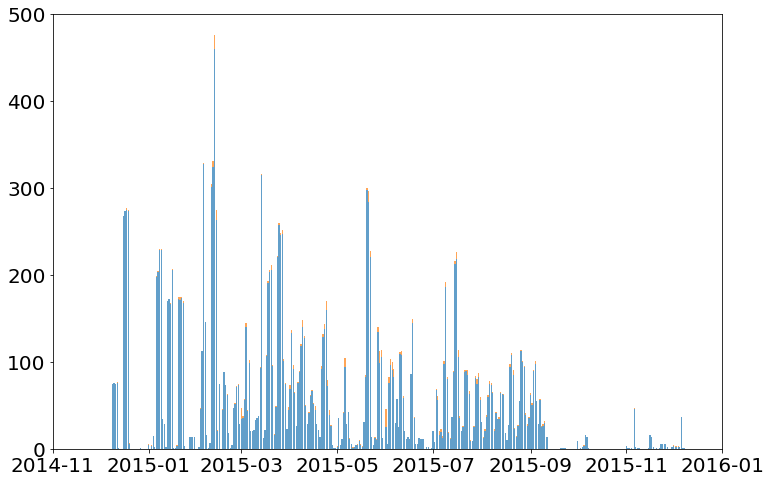

In [134]:
f,a = plt.subplots(1,1,figsize=(12,8))

a.bar(combined.index, combined.iloc[:,1].values,alpha=.7,label='Triggering')
a.bar(combined.index, combined.iloc[:,0], bottom=combined.iloc[:,1],alpha=.7,label='Triggering')
#plt.bar(followup_counts.index, followup_counts.values,alpha=.7,label='Triggering')
a.set_xlim(datetime(2014,11,1),datetime(2016,1,1))

In [240]:
digital_missing_counts = fill_datetime(digital[digital_miss_text].today, 2015)
digital_present_counts = fill_datetime(digital[~digital_miss_text].today, 2015)

In [241]:
combined_digital = pd.concat([digital_missing_counts,digital_present_counts],axis=1).fillna(0)

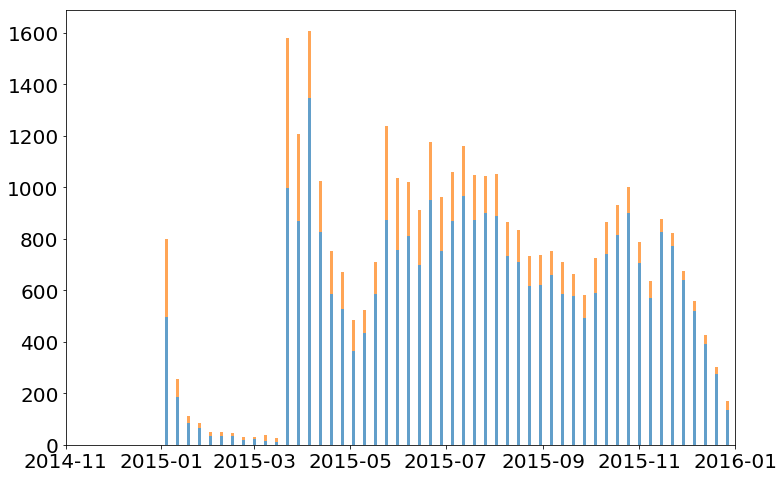

In [255]:
f,a = plt.subplots(1,1,figsize=(12,8))

target_df = combined_digital

a.bar(target_df.iloc[:,1].resample('W').sum().index, target_df.iloc[:,1].resample('W').sum(), width=2,alpha=.7,label='Triggering')
a.bar(target_df.iloc[:,1].resample('W').sum().index, target_df.iloc[:,0].resample('W').sum(), width=2,bottom=target_df.iloc[:,1].resample('W').sum(),alpha=.7,label='Triggering')
#plt.bar(followup_counts.index, followup_counts.values,alpha=.7,label='Triggering')
a.set_xlim(datetime(2014,11,1),datetime(2016,1,1))

plt.savefig('Weekly_Text_Repeats_digital.pdf')

In [156]:
digital_text = digital[[f'g_actionstat/action{i}' for i in [1,2,4,5]]+['g_actionstat/biggest_change']]


In [163]:
repeats = digital_text['g_actionstat/biggest_change'].value_counts()[digital_text['g_actionstat/biggest_change'].value_counts()>1].index

In [166]:
digital_text['g_actionstat/biggest_change'].isin(repeats)

0        False
1         True
2        False
3        False
4        False
         ...  
36601    False
36602    False
36603    False
36604    False
36605    False
Name: g_actionstat/biggest_change, Length: 36606, dtype: bool

In [191]:
repeat_inds = []
for col in digital_text.columns:
    repeats = digital_text[col].value_counts()[digital_text[col].value_counts()>1].index
    repeat_inds.append(digital_text[col].isin(repeats))

In [213]:
repeats = []
for i in range(5):
    repeats.append((pd.concat(repeat_inds,axis=1).sum(axis=1)==i).sum())

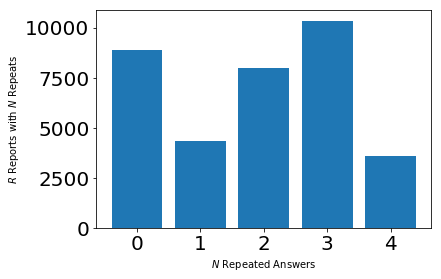

In [233]:
plt.bar(range(5), repeats)
plt.xlabel('$N$ Repeated Answers')
plt.ylabel('$R$ Reports with $N$ Repeats')
plt.xticks(range(5))

plt.savefig('N_duplicate_response.pdf')

In [217]:
missing_more = pd.concat(repeat_inds,axis=1).sum(axis=1)>2

In [218]:
digital_missing_counts = fill_datetime(digital[missing_more].today)
digital_present_counts = fill_datetime(digital[~missing_more].today)

In [220]:
combined_digital = pd.concat([digital_missing_counts,digital_present_counts],axis=1).fillna(0)

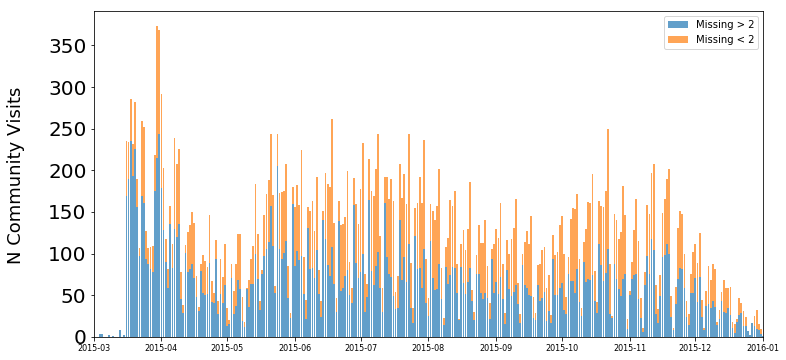

In [235]:
f,a = plt.subplots(1,1,figsize=(12,6))

target_df = combined_digital

a.bar(target_df.index, target_df.iloc[:,1].values, alpha=.7, label='Missing > 2')
a.bar(target_df.index, target_df.iloc[:,0].values, bottom=target_df.iloc[:,1], alpha=.7, label='Missing < 2')
#plt.bar(followup_counts.index, followup_counts.values,alpha=.7,label='Triggering')
a.set_xlim(datetime(2015,3,1),datetime(2016,1,1))
a.legend()
a.tick_params(axis='x',labelrotation=0,labelsize=8)
f.text(.025,.5,'N Community Visits', va='center', rotation=90, fontsize=18)

plt.savefig('Duplicate_responses.pdf')

/home/hereford/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/home/hereford/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


<BarContainer object of 24349 artists>

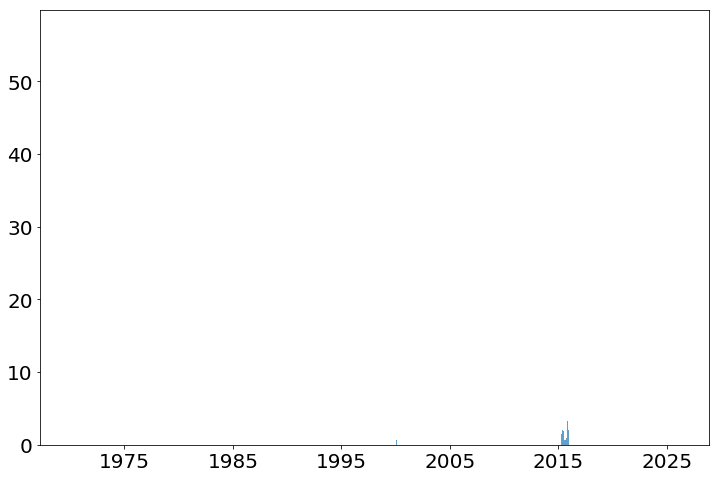

In [229]:
f,a = plt.subplots(1,1,figsize=(12,8))

target_df = combined_digital

a.bar(target_df.index, target_df.iloc[:,1].values/target_df.iloc[:,0].values, alpha=.7, label='Triggering')